# Transformation of reference systems

Author: Juan A. Ramírez-Macías  
*Professor, Mechanical Engineering Department*  
Universidad Pontificia Bolivariana  
Email: juan.ramirez@upb.edu.co  

This code shows how to compute coordinates with respect to a reference system $\{ O \}$ when the coordinates with respect to another coordinate system $\{ A \}$ are known. The position and orientation of $\{ A \}$ with respect to $\{ O \}$ are known before-hand.

In [1]:
# First load required modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Transformation of coordinates between O and A
Reference system $\{A\}$ is located at coordinates $(1430, -345, 250)$ mm, with respect to reference system $\{O\}$.
This vector is written as $\vec{r}_{A \mathrm{org}}^O = [1430, -345, 250]^\top$ mm.

The location of the origin of $\{A \}$ with respect to $\{ O \}$ is defined in the code as

In [2]:
P_Aorg = np.array([[1430.], [-345.], [250.]])
print P_Aorg

[[ 1430.]
 [ -345.]
 [  250.]]


Reference system $\{ A \}$ is rotated positively with respect to $\{ O\}$ an angle $\theta = \pi/2$ (90 deg) around  $z$-axis. This rotation is given by matrix
$$ \mathbf{R}_z(\theta) = \left[\begin{array}{rrr} \cos{\theta} & -\sin{\theta} & 0 \\ \sin{\theta} & \cos{\theta} & 0 \\ 0 & 0 & 1
\end{array} \right].$$
We can declare a function to ease the computation as follows

In [3]:
def R_z(theta):
    return np.array([[np.cos(theta), -np.sin(theta), 0.],
                     [np.sin(theta),  np.cos(theta), 0.],
                     [0., 0., 1.]])

This function returns a $3 \times 3$ matrix that takes a vector in the same orientation as $\{ A \}$ to its representation in $\{ O \}$. For instance, given $\theta = \pi/2$, the rotation matrix is computed as

In [4]:
theta = np.pi / 4.
R_AO = R_z(theta)
print R_AO

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


We can plot reference systems $\{ A \}$ and $\{ O \}$ using the code below. The $x,y,z$ color convention is RGB: $x$-axis is red, $y$-axis is green, and $z$-axis is blue.

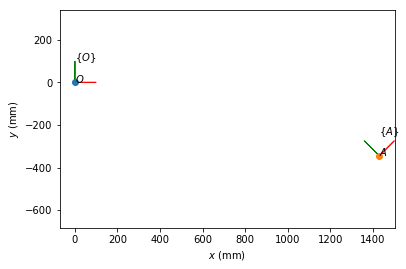

In [5]:
plt.figure()

# Drawing of system {0}
# Origin
plt.plot(0., 0., 'o')
# Axes
plt.arrow(0., 0., 100., 0., color = 'r')
plt.arrow(0., 0., 0., 100., color = 'g')

# Drawing of system {A}
# Origin
plt.plot(P_Aorg[0,0], P_Aorg[1,0], 'o')
# Axes
plt.arrow(P_Aorg[0,0], P_Aorg[1,0], 100. * np.cos(theta), 100. * np.sin(theta), color = 'r')
plt.arrow(P_Aorg[0,0], P_Aorg[1,0], -100. * np.sin(theta), 100. * np.cos(theta), color = 'g')

# Texts
plt.text(0., 0., '$O$')
plt.text(P_Aorg[0,0], P_Aorg[1,0], '$A$')
plt.text(0., 100., '$\{ O \}$')
plt.text(P_Aorg[0,0], P_Aorg[1,0] + 100., '$\{ A \}$')

# Axes settings
plt.xlabel('$x$ (mm)')
plt.ylabel('$y$ (mm)')
plt.axis('equal')
plt.show()

## Points given with respect to A
Assume that some points are given with respect to $\{ A \}$. For instance, the vertices of the table. This is specified by the following array

In [6]:
P_tableA = np.array([[0., 0., 0.], [660., 0., 0.], [660., 530., 0.], [0., 530., 0.]])
print P_tableA

[[   0.    0.    0.]
 [ 660.    0.    0.]
 [ 660.  530.    0.]
 [   0.  530.    0.]]


Please note in the array above that the first column represents $x$-coordinate, the second $y$-coordinate, and the third $z$-coordinate.  
From the point of view of frame $\{ A \}$ the points are drawn as

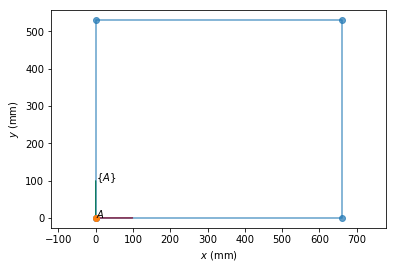

In [7]:
plt.figure()

# Table vertices
Npoints = P_tableA.shape[0]
tableVert = np.zeros([Npoints + 1,3])
tableVert[:-1,:] = P_tableA
tableVert[-1,:] = P_tableA[0,:]
plt.plot(tableVert[:,0], tableVert[:,1], 'o-', alpha = 0.7)

# Drawing of system {A}
# Origin
plt.plot(0., 0., 'o')
# Axes
plt.arrow(0., 0., 100., 0., color = 'r')
plt.arrow(0., 0., 0., 100., color = 'g')

# Texts
plt.text(0., 0., '$A$')
plt.text(0., 100., '$\{ A \}$')

# Axis settings
plt.xlabel('$x$ (mm)')
plt.ylabel('$y$ (mm)')
plt.axis('equal')
plt.show()

## Expressing the points with respect to {O}
The location of points with respect to $\{ O \}$ is computed as
$$
\vec{r}_{P/O}^O = \vec{r}_{A \mathrm{org}}^O + \mathbf{R}_{z} (\theta) \vec{r}_{P/A}^A
$$
where $P$ is any point, $\vec{r}_{P/O}^O$ are coordinates given with respect to $\{O\}$, $\vec{r}_{P/A}^A$ are coordinates given with respect to $\{A\}$, $\mathbf{R}_{z} (\theta)$ is the rotation matrix, and $\vec{r}_{A \mathrm{org}}^O$ is the location of the coordinates of $\{ A \}$ with respect to $\{ O \}$. For the table vertices this is computed as

In [8]:
P_tableO = P_Aorg + np.dot(R_AO, P_tableA.T)
print P_tableO.T

[[ 1430.          -345.           250.        ]
 [ 1896.69047558   121.69047558   250.        ]
 [ 1521.92388155   496.45706961   250.        ]
 [ 1055.23340597    29.76659403   250.        ]]


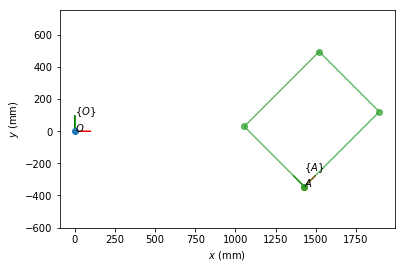

In [9]:
plt.figure()

# Drawing of system {0}
# Origin
plt.plot(0., 0., 'o')
# Axes
plt.arrow(0., 0., 100., 0., color = 'r')
plt.arrow(0., 0., 0., 100., color = 'g')

# Drawing of system {A}
# Origin
plt.plot(P_Aorg[0,0], P_Aorg[1,0], 'o')
# Axes
plt.arrow(P_Aorg[0,0], P_Aorg[1,0], 100. * np.cos(theta), 100. * np.sin(theta), color = 'r')
plt.arrow(P_Aorg[0,0], P_Aorg[1,0], -100. * np.sin(theta), 100. * np.cos(theta), color = 'g')

# Table vertices
Npoints = P_tableO.shape[1]
tableVert = np.zeros([Npoints + 1, 3])
tableVert[:-1,:] = P_tableO.T
tableVert[-1,:] = P_tableO[:,0].T
plt.plot(tableVert[:,0], tableVert[:,1], 'o-', alpha = 0.7)

# Texts
plt.text(0., 0., '$O$')
plt.text(P_Aorg[0,0], P_Aorg[1,0], '$A$')
plt.text(0., 100., '$\{ O \}$')
plt.text(P_Aorg[0,0], P_Aorg[1,0] + 100., '$\{ A \}$')

# Axes settings
plt.xlabel('$x$ (mm)')
plt.ylabel('$y$ (mm)')
plt.axis('equal')
plt.show()

## Arbitrary points

In [10]:
P_B = np.array([[50., 25., 0.], [70., 109., 0.], [95., 432., 0.], [130., 10., 0.]])
P_O = P_Aorg + np.dot(R_AO, P_B.T)
print P_O.T

[[ 1447.67766953  -291.96699141   250.        ]
 [ 1402.42283553  -218.42788617   250.        ]
 [ 1191.70501474    27.64527369   250.        ]
 [ 1514.85281374  -246.00505063   250.        ]]


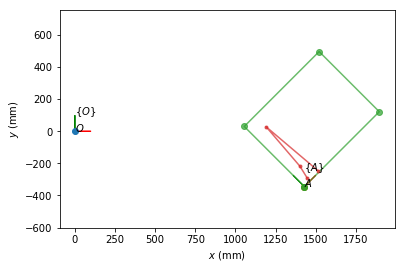

In [11]:
plt.figure()

# Drawing of system {0}
# Origin
plt.plot(0., 0., 'o')
# Axes
plt.arrow(0., 0., 100., 0., color = 'r')
plt.arrow(0., 0., 0., 100., color = 'g')

# Drawing of system {A}
# Origin
plt.plot(P_Aorg[0,0], P_Aorg[1,0], 'o')
# Axes
plt.arrow(P_Aorg[0,0], P_Aorg[1,0], 100. * np.cos(theta), 100. * np.sin(theta), color = 'r')
plt.arrow(P_Aorg[0,0], P_Aorg[1,0], -100. * np.sin(theta), 100. * np.cos(theta), color = 'g')

# Table vertices
Npoints = P_tableO.shape[1]
tableVert = np.zeros([Npoints + 1, 3])
tableVert[:-1,:] = P_tableO.T
tableVert[-1,:] = P_tableO[:,0].T
plt.plot(tableVert[:,0], tableVert[:,1], 'o-', alpha = 0.7)

# Points
plt.plot(P_O[0,:], P_O[1,:], '.-', alpha = 0.7)

# Texts
plt.text(0., 0., '$O$')
plt.text(P_Aorg[0,0], P_Aorg[1,0], '$A$')
plt.text(0., 100., '$\{ O \}$')
plt.text(P_Aorg[0,0], P_Aorg[1,0] + 100., '$\{ A \}$')

# Axes settings
plt.xlabel('$x$ (mm)')
plt.ylabel('$y$ (mm)')
plt.axis('equal')
plt.show()